**INTEGRANTES EQUIPO 15**


*   David García Robles A01152606
*   Carlos M. Ramirez A01795036
*   Fernando Garcia Corona A01793717

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357227 sha256=9b50ccd7e3dd131314d76a0022a74bfb72b8f9c993caadeaa220cfee8f6f702e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split


In [5]:
# Cargar el conjunto de datos
df = pd.read_csv(DATA_PATH , encoding='unicode_escape')

In [6]:
# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [7]:
# Resumen estadístico del conjunto de datos
print("\nResumen estadístico del conjunto de datos:")
print(df.describe())


Resumen estadístico del conjunto de datos:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


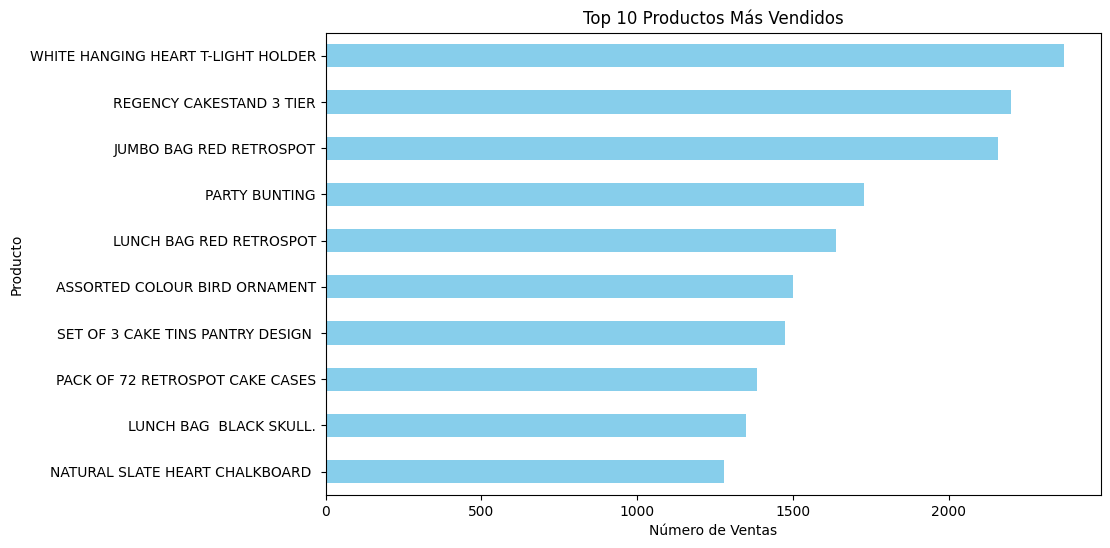

In [8]:
# Distribución de productos más vendidos
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Número de Ventas')
plt.ylabel('Producto')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el producto más vendido en la parte superior
plt.show()

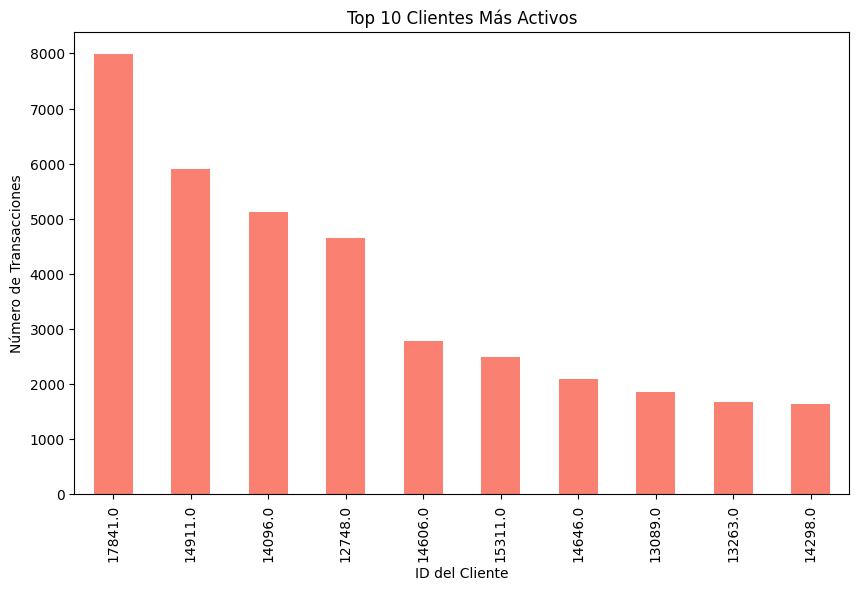

In [9]:
# Análisis de clientes más activos
active_customers = df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
active_customers.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes Más Activos')
plt.xlabel('ID del Cliente')
plt.ylabel('Número de Transacciones')
plt.show()

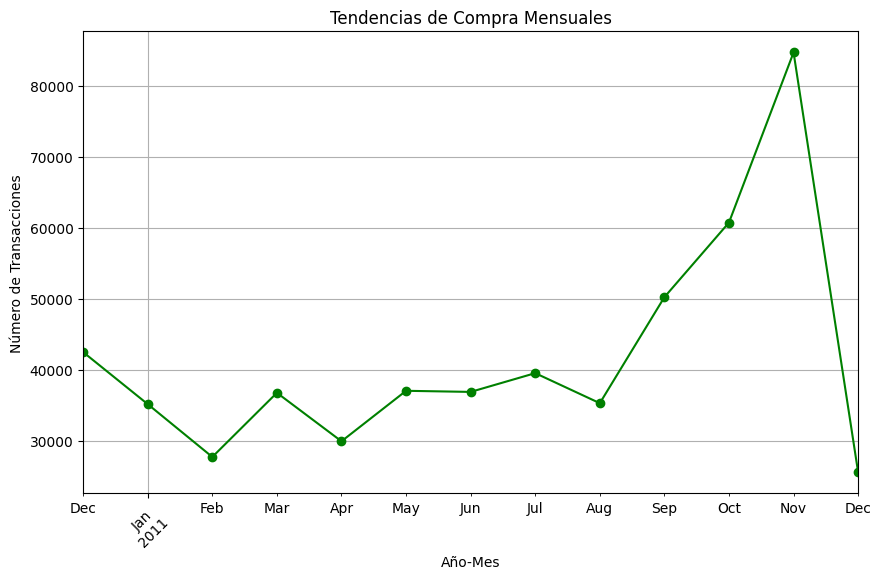

In [10]:
# Tendencias de compra a lo largo del tiempo
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['InvoiceNo'].count()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Tendencias de Compra Mensuales')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-11-93476b48b089>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='viridis')


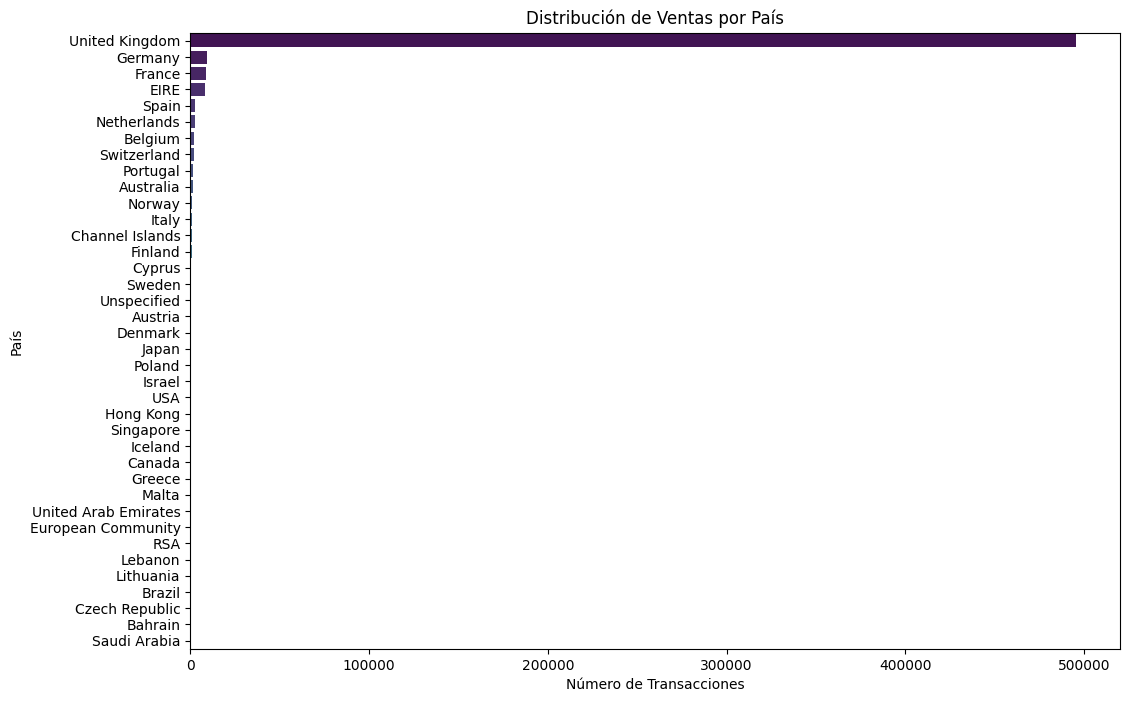

In [11]:
# Distribución de ventas por país
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette='viridis')
plt.title('Distribución de Ventas por País')
plt.xlabel('Número de Transacciones')
plt.ylabel('País')
plt.show()

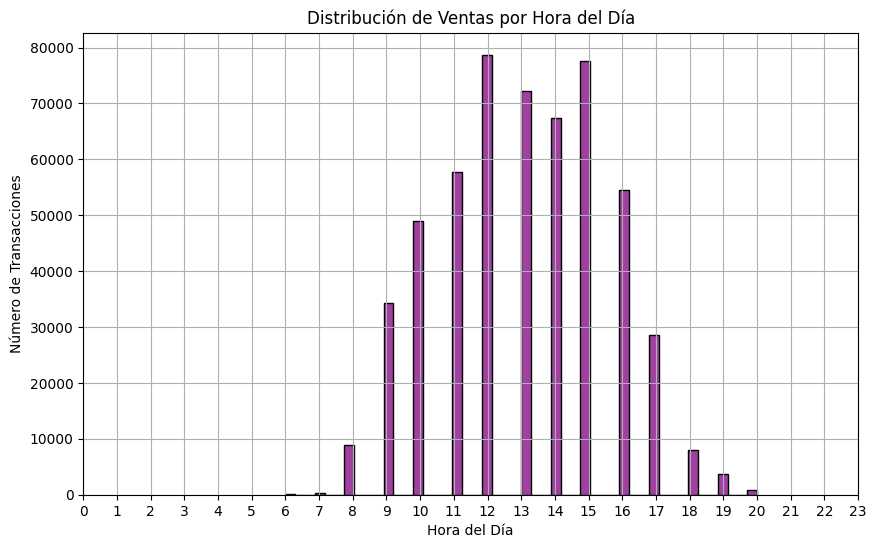

In [12]:
# Extracción de la hora del día de la columna InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Distribución de ventas por hora del día
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=48, kde=False, color='purple')
plt.title('Distribución de Ventas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Transacciones')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

In [20]:
import time
from surprise import accuracy
from collections import defaultdict
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
# Sistema de recomendacion por SVD

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df[['CustomerID', 'Description', 'Quantity']], reader)

# Dividir el conjunto de datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Configurar y entrenar el modelo SVD
model = SVD()
model.fit(trainset)

training_time = time.time() - start_time

def get_recommendations(CustomerID):                                            # Se crea una lista de todos los productos únicos en el conjunto de datos
    items = df['Description'].unique()

    user_products = trainset.ur[trainset.to_inner_uid(CustomerID)]              # Se obtienen los índices de los productos comprados por el cliente en el conjunto de entrenamiento
    bght_items = [trainset.to_raw_iid(item_id) for (item_id, _) in user_products]

    items_recommend = [prod for prod in items if prod not in bght_items]        # Se crea una lista de productos no comprados por el cliente


    predictions = [model.predict(CustomerID, item) for item in items_recommend] # Generar predicciones para los productos no comprados

    predictions.sort(key=lambda x: x.est, reverse=True)                         # Ordenar las predicciones en orden descendente

    top_recommendations = [pred.iid for pred in predictions[:10]]               # Obtener los nombres de los productos recomendados

    return top_recommendations

customer_id = 14502.0
recommendations = get_recommendations(customer_id)

print("\nRecomendaciones para el cliente con CustomerID =", customer_id)
print(recommendations)




Recomendaciones para el cliente con CustomerID = 14502.0
['WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL']


# `Métricas`

In [21]:
# Evaluar el modelo en el conjunto de prueba
predictions = model.test(testset)

# Calcular RMSE y MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Función para calcular precisión y recall
def precision_recall_at_k(predictions, k=10, threshold=0.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Calcular precisión y recall
precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=0.5)
precision = sum(prec for prec in precisions.values()) / len(precisions)
recall = sum(rec for rec in recalls.values()) / len(recalls)

# Imprimir resultados
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")

RMSE: 248.8441
MAE:  10.1931
Tiempo de entrenamiento: 9.58 segundos
RMSE: 248.8441
MAE: 10.1931
Precisión: 0.9862
Recall: 0.9666
